#Demographic Segmentation:

1. Importing libraries and datasets

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

In [49]:
customer_df = pd.read_csv('/content/customer_dataset.csv')

In [50]:
customer_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [51]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [52]:
customer_df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [53]:
customer_df.isnull().sum()

,0
Age,0
Profession,0
Marrital Status,0
Education,0
No of Dependents,0
Personal loan,0
House Loan,0
Wife Working,0
Salary,0
Wife Salary,0


2. Segmentation by Age, Profession, and Salary:

In [54]:
# Create salary range categories for segmentation
customer_df['Salary_Range'] = pd.cut(customer_df['Salary'],
                                     bins=[0, 500000, 1000000, 2000000, 3000000],
                                     labels=['<5 Lakhs', '5-10 Lakhs', '10-20 Lakhs', '>20 Lakhs'])


customer_segments = customer_df.groupby(['Age', 'Profession', 'Salary_Range'])['Make'].count().reset_index(name='Count')


customer_segments.head(10)


<ipython-input-54-163f56551af6>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_segments = customer_df.groupby(['Age', 'Profession', 'Salary_Range'])['Make'].count().reset_index(name='Count')


,Age,Profession,Salary_Range,Count
0,26,Business,<5 Lakhs,0
1,26,Business,5-10 Lakhs,0
2,26,Business,10-20 Lakhs,0
3,26,Business,>20 Lakhs,0
4,26,Salaried,<5 Lakhs,0
5,26,Salaried,5-10 Lakhs,1
6,26,Salaried,10-20 Lakhs,0
7,26,Salaried,>20 Lakhs,0
8,27,Business,<5 Lakhs,0
9,27,Business,5-10 Lakhs,0


3. Identifying Key Segments:

In [55]:
# Sort segments by the number of customers in each segment
sorted_segments = customer_segments.sort_values(by='Count', ascending=False)
sorted_segments.head(10)


,Age,Profession,Salary_Range,Count
78,35,Salaried,10-20 Lakhs,8
82,36,Business,10-20 Lakhs,6
46,31,Salaried,10-20 Lakhs,5
119,42,Salaried,>20 Lakhs,4
13,27,Salaried,5-10 Lakhs,3
94,37,Salaried,10-20 Lakhs,3
86,36,Salaried,10-20 Lakhs,3
70,34,Salaried,10-20 Lakhs,3
29,29,Salaried,5-10 Lakhs,2
34,30,Business,10-20 Lakhs,2


4.Visualizing the Data:

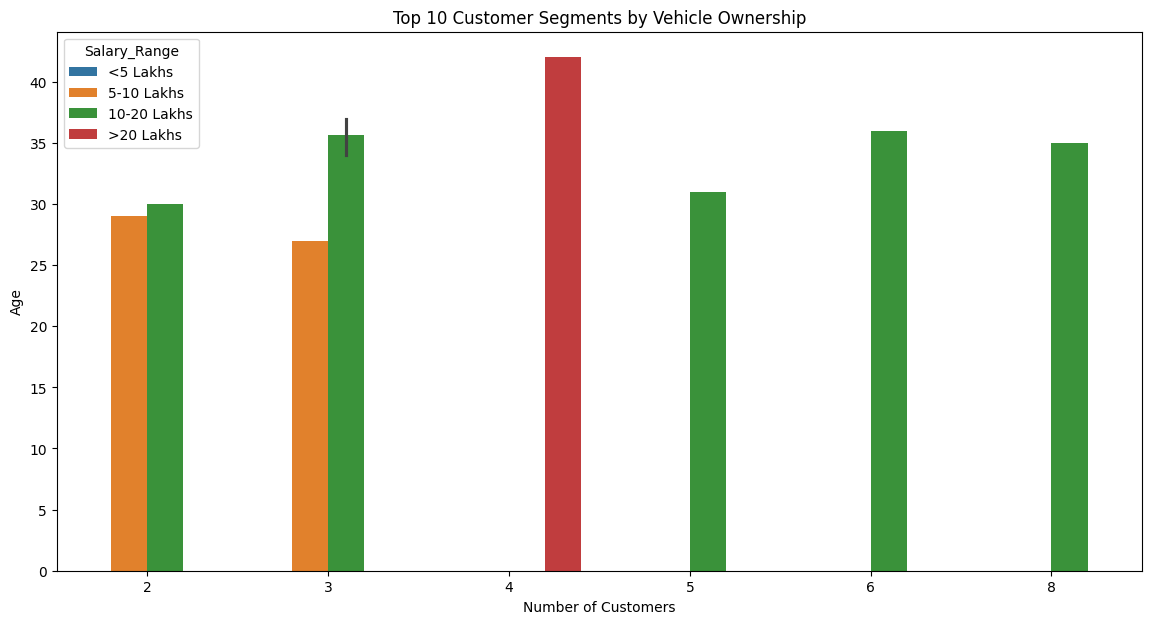

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top 10 customer segments
plt.figure(figsize=(14, 7))
sns.barplot(data=sorted_segments.head(10), x='Count', y='Age', hue='Salary_Range')
plt.title('Top 10 Customer Segments by Vehicle Ownership')
plt.xlabel('Number of Customers')
plt.ylabel('Age')
plt.show()


Exploring Vehicle Ownership by Demographics:

In [56]:
# Group by Age, Profession, and Salary Range to see the vehicle preferences
vehicle_ownership = customer_df.groupby(['Age', 'Profession', 'Salary_Range', 'Make']).size().reset_index(name='Ownership_Count')
vehicle_ownership.sort_values(by='Ownership_Count', ascending=False).head(20)


<ipython-input-56-af9bbf2053da>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle_ownership = customer_df.groupby(['Age', 'Profession', 'Salary_Range', 'Make']).size().reset_index(name='Ownership_Count')


,Age,Profession,Salary_Range,Make,Ownership_Count
708,35,Salaried,10-20 Lakhs,SUV,3
345,30,Salaried,10-20 Lakhs,Creata,2
702,35,Salaried,10-20 Lakhs,Baleno,2
703,35,Salaried,10-20 Lakhs,Ciaz,2
642,34,Salaried,>20 Lakhs,Creata,2
117,27,Salaried,5-10 Lakhs,Baleno,2
189,28,Salaried,5-10 Lakhs,Baleno,2
638,34,Salaried,10-20 Lakhs,i20,2
786,36,Salaried,>20 Lakhs,Creata,2
415,31,Salaried,10-20 Lakhs,Ciaz,2


Analyzing Profession and Vehicle Ownership:

In [57]:
# Grouping by Profession and Make to see which professions prefer which vehicles
profession_vehicle = customer_df.groupby(['Profession', 'Make']).size().reset_index(name='Ownership_Count')
profession_vehicle = profession_vehicle.sort_values(by='Ownership_Count', ascending=False)
profession_vehicle.head(10)


,Profession,Make,Ownership_Count
14,Salaried,SUV,13
8,Salaried,Baleno,11
11,Salaried,Creata,11
9,Salaried,Ciaz,8
0,Business,Baleno,8
10,Salaried,City,7
16,Salaried,i20,7
5,Business,SUV,6
7,Business,i20,5
1,Business,Ciaz,4


Income Analysis:

In [58]:
# Grouping by Salary Range and Make to see which income groups prefer which vehicles
income_vehicle = customer_df.groupby(['Salary_Range', 'Make']).size().reset_index(name='Ownership_Count')
income_vehicle = income_vehicle.sort_values(by='Ownership_Count', ascending=False)
income_vehicle.head(10)


<ipython-input-58-7bc1f039f8da>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_vehicle = customer_df.groupby(['Salary_Range', 'Make']).size().reset_index(name='Ownership_Count')


,Salary_Range,Make,Ownership_Count
18,10-20 Lakhs,Baleno,11
24,10-20 Lakhs,SUV,11
26,10-20 Lakhs,i20,9
30,>20 Lakhs,Creata,7
20,10-20 Lakhs,City,7
9,5-10 Lakhs,Baleno,7
19,10-20 Lakhs,Ciaz,6
22,10-20 Lakhs,Duster,6
28,>20 Lakhs,Ciaz,5
21,10-20 Lakhs,Creata,5


Cross-Analysis of Age and Vehicle Type:

In [59]:
# Grouping by Age and Make to see which age groups prefer which vehicles
age_vehicle = customer_df.groupby(['Age', 'Make']).size().reset_index(name='Ownership_Count')
age_vehicle = age_vehicle.sort_values(by='Ownership_Count', ascending=False)
age_vehicle.head(10)


,Age,Make,Ownership_Count
36,36,SUV,4
28,35,Baleno,3
30,35,SUV,3
1,27,Baleno,3
38,36,i20,3
14,31,Baleno,2
29,35,Ciaz,2
24,34,Creata,2
31,35,i20,2
50,41,Creata,2


Analyzing Vehicle Brand Preferences:

In [60]:
# Grouping by Make and Salary Range to see the brand preferences across different income groups
brand_preference = customer_df.groupby(['Make', 'Salary_Range']).size().reset_index(name='Ownership_Count')
brand_preference = brand_preference.sort_values(by='Ownership_Count', ascending=False)
brand_preference.head(10)


<ipython-input-60-dded32ea518f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_preference = customer_df.groupby(['Make', 'Salary_Range']).size().reset_index(name='Ownership_Count')


,Make,Salary_Range,Ownership_Count
2,Baleno,10-20 Lakhs,11
26,SUV,10-20 Lakhs,11
34,i20,10-20 Lakhs,9
15,Creata,>20 Lakhs,7
1,Baleno,5-10 Lakhs,7
10,City,10-20 Lakhs,7
18,Duster,10-20 Lakhs,6
6,Ciaz,10-20 Lakhs,6
7,Ciaz,>20 Lakhs,5
27,SUV,>20 Lakhs,5


Advanced Visualization:

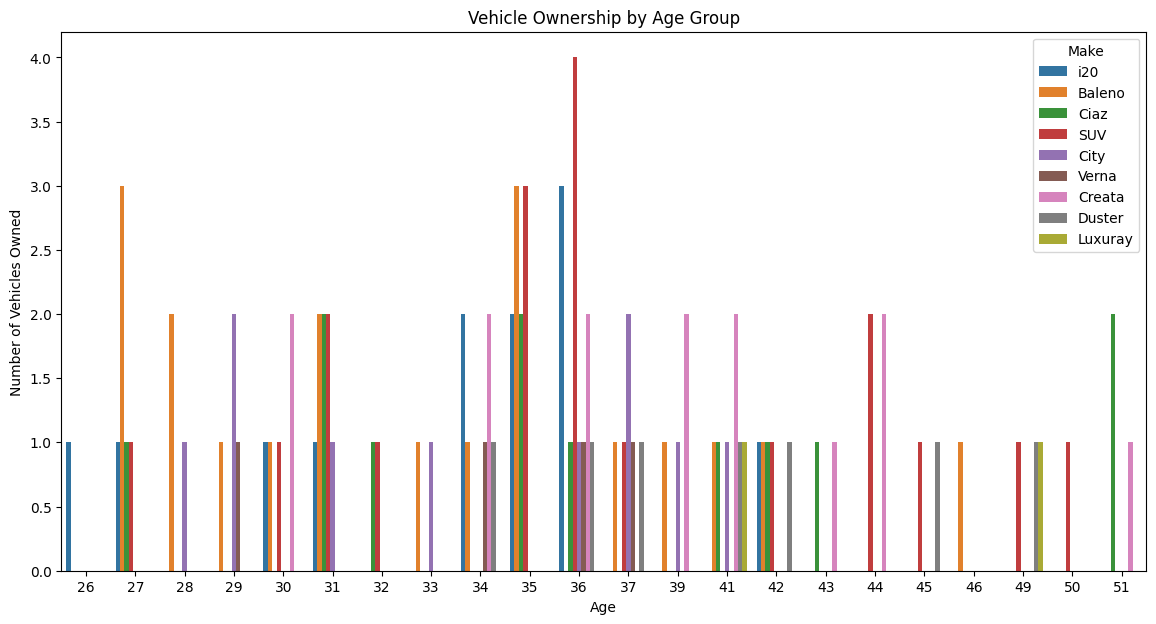

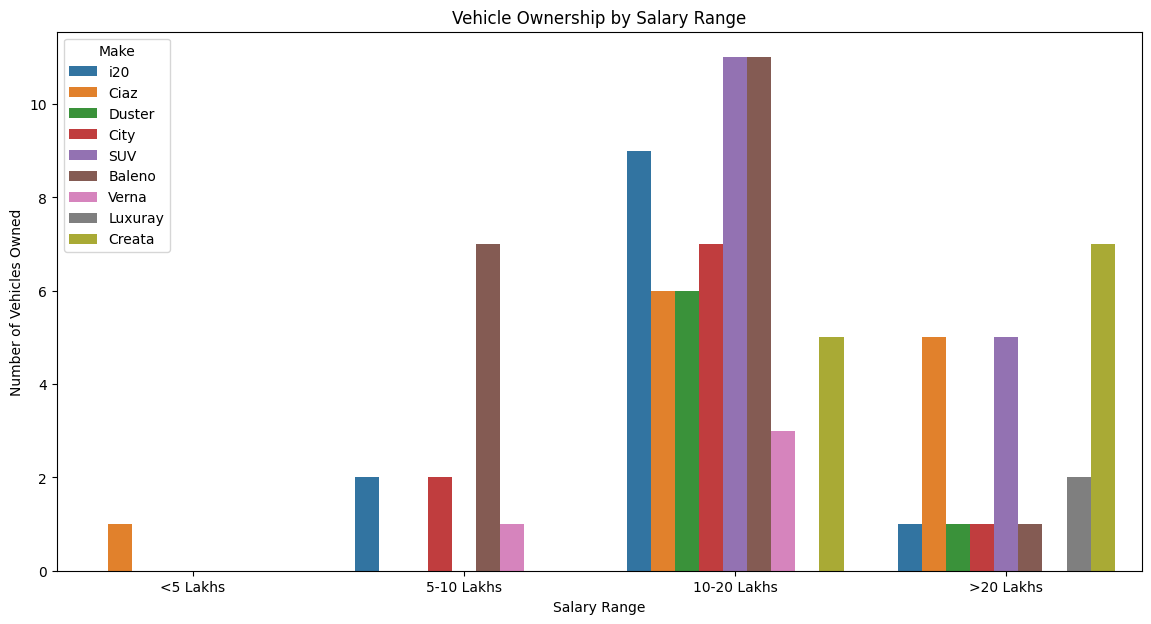

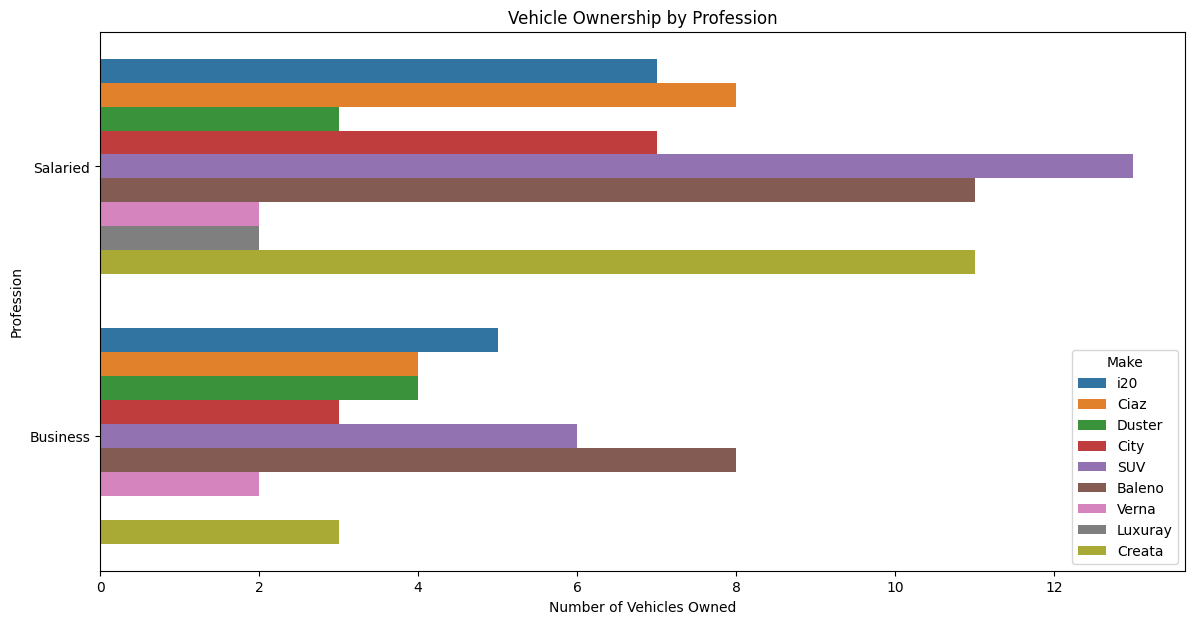

In [12]:
# Vehicle ownership by age group
plt.figure(figsize=(14, 7))
sns.countplot(data=customer_df, x='Age', hue='Make')
plt.title('Vehicle Ownership by Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Vehicles Owned')
plt.show()

# Vehicle ownership by salary range
plt.figure(figsize=(14, 7))
sns.countplot(data=customer_df, x='Salary_Range', hue='Make')
plt.title('Vehicle Ownership by Salary Range')
plt.xlabel('Salary Range')
plt.ylabel('Number of Vehicles Owned')
plt.show()

# Vehicle ownership by profession
plt.figure(figsize=(14, 7))
sns.countplot(data=customer_df, y='Profession', hue='Make')
plt.title('Vehicle Ownership by Profession')
plt.xlabel('Number of Vehicles Owned')
plt.ylabel('Profession')
plt.show()


Clustering for Market Segmentation

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = customer_df[['Age', 'Salary']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-Means clustering
kmeans


KMeans(n_clusters=4, random_state=42)

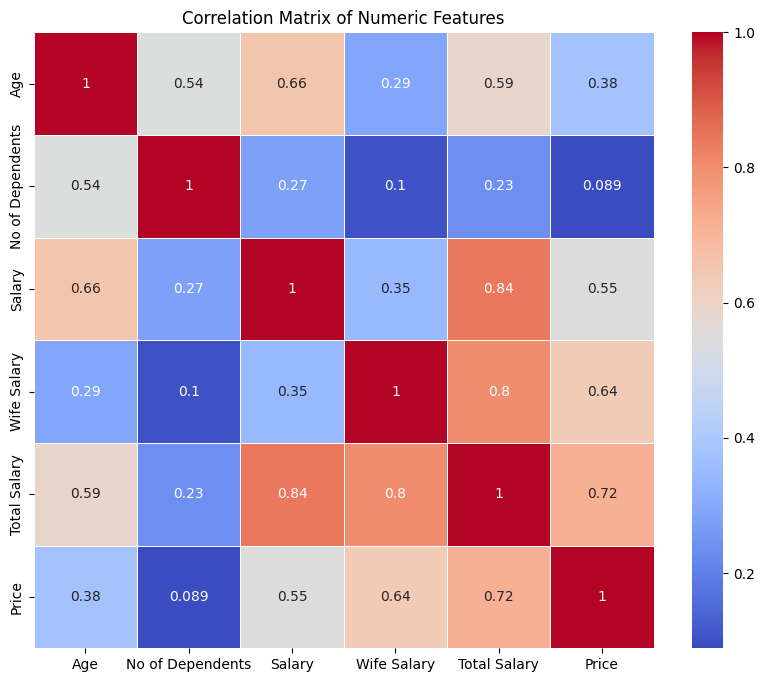

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = customer_df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


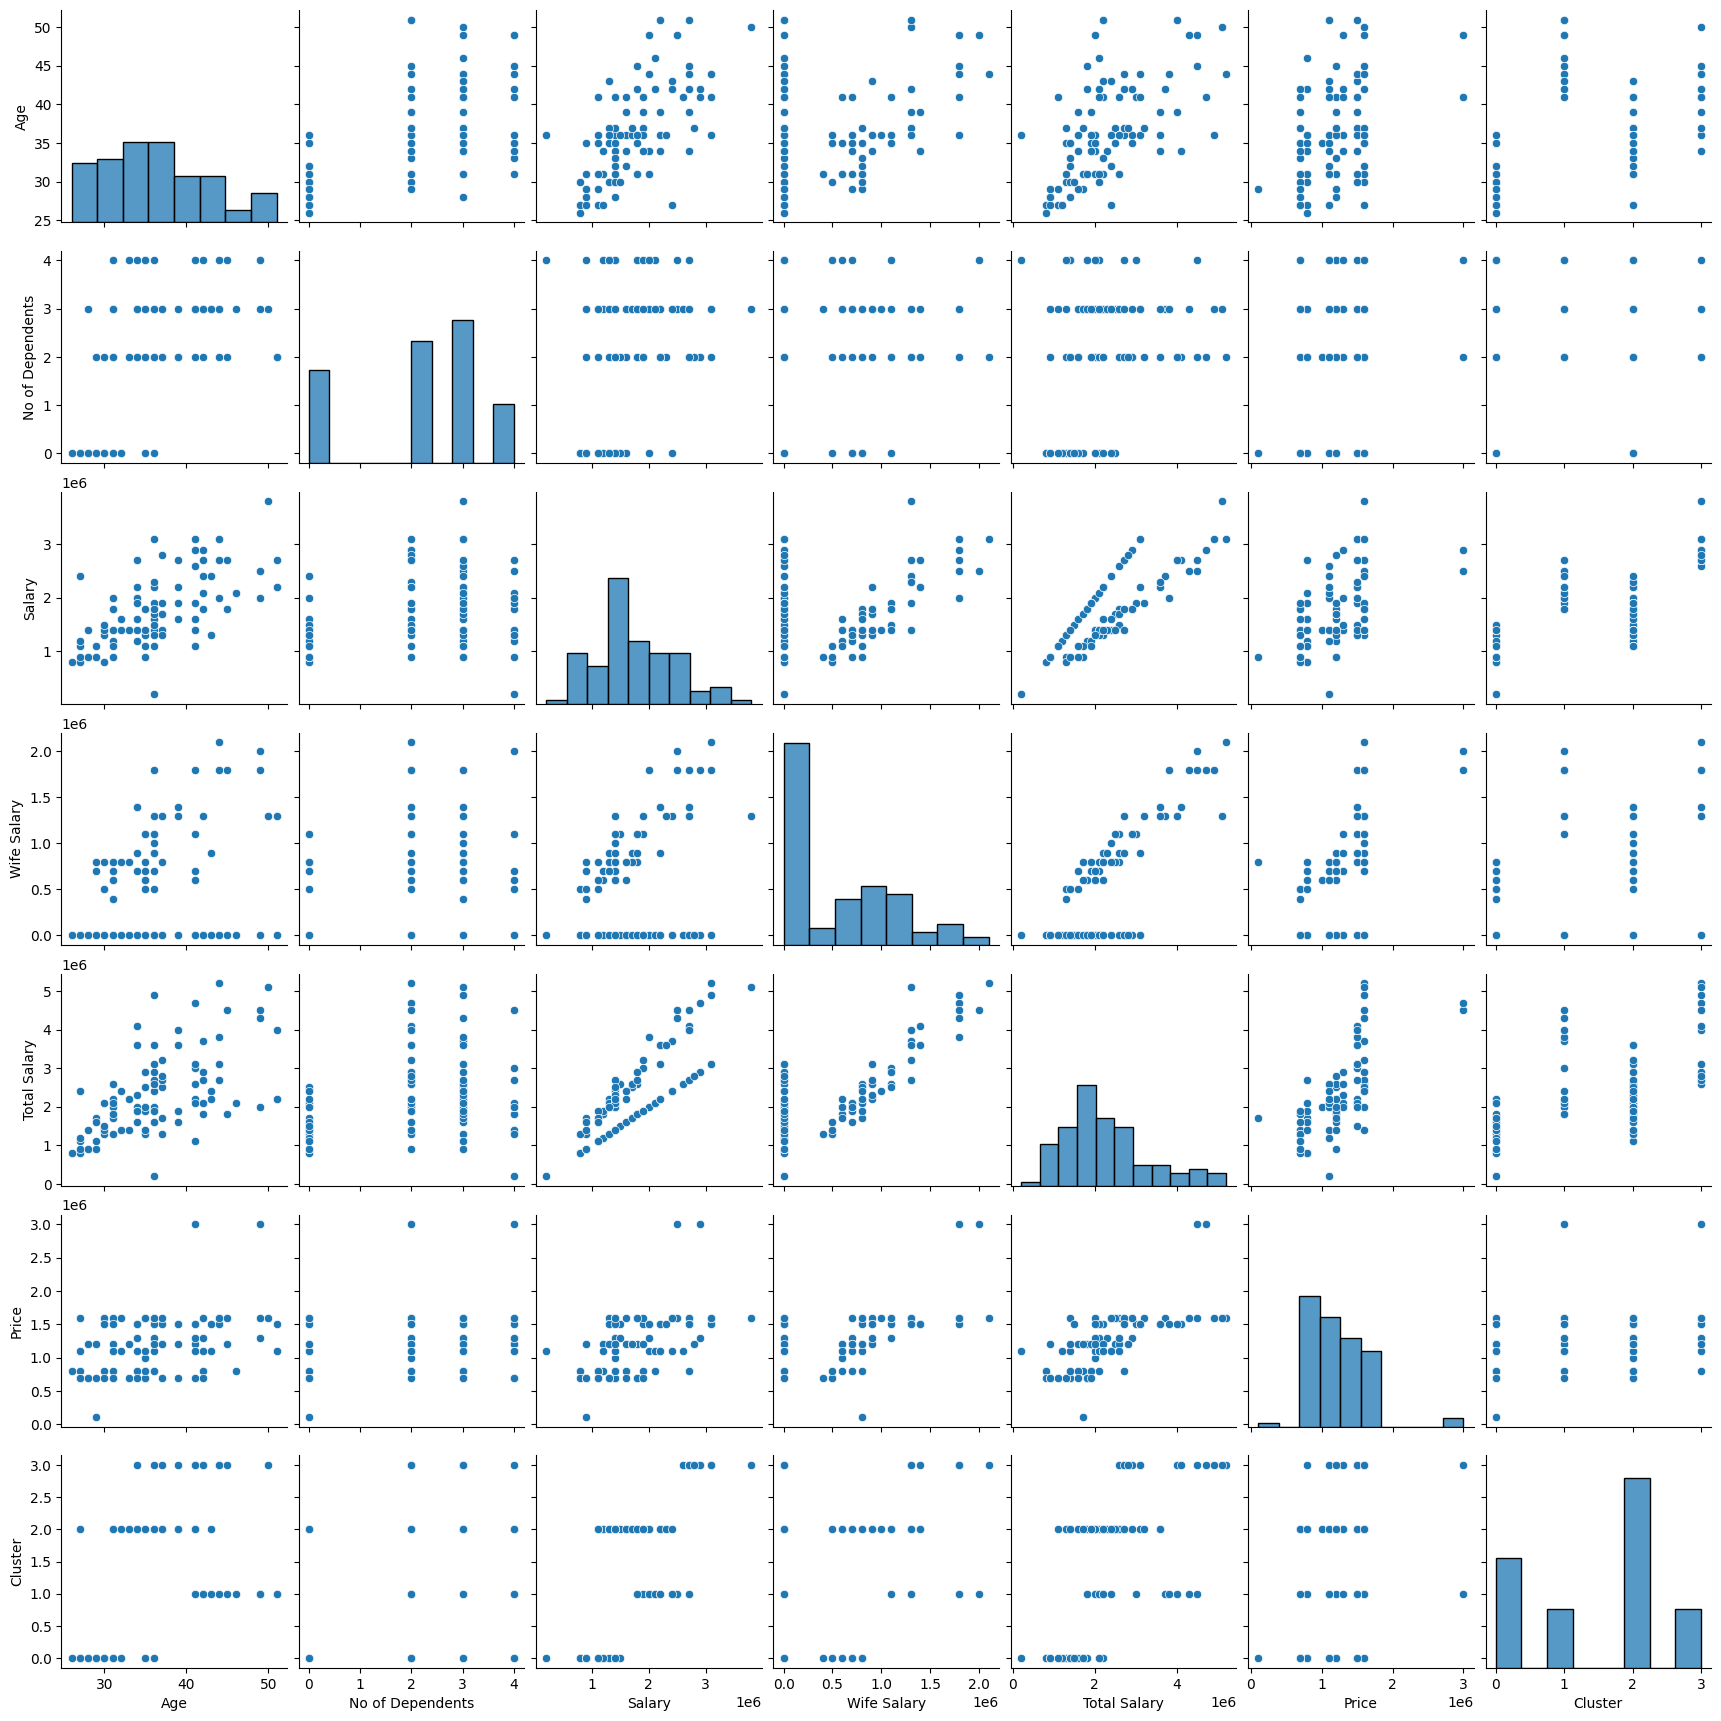

In [19]:
sns.pairplot(customer_df)

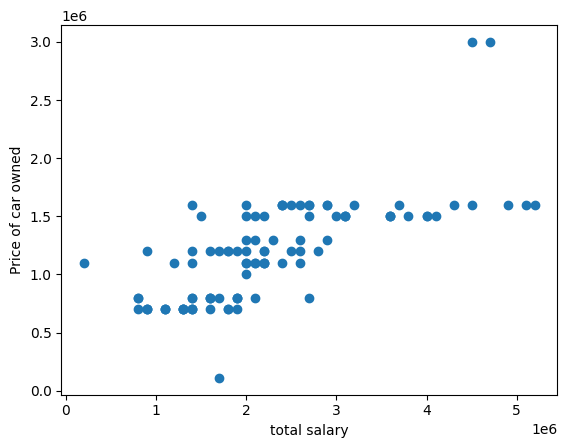

In [20]:
plt.xlabel('total salary')
plt.ylabel('Price of car owned')
plt.scatter(customer_df['Total Salary'],customer_df['Price'])

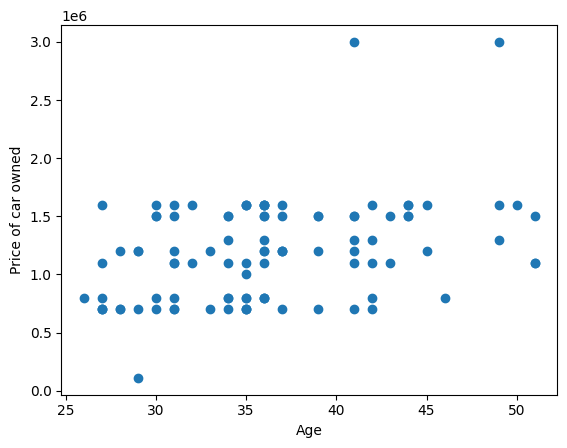

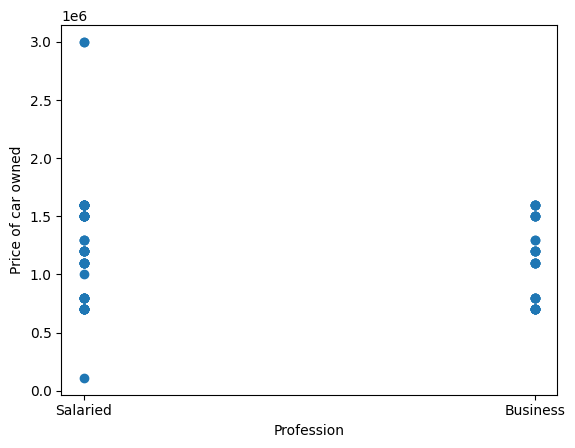

In [21]:
plt.xlabel('Age')
plt.ylabel('Price of car owned')
plt.scatter(customer_df['Age'],customer_df['Price'])
plt.show()
plt.xlabel('Profession')
plt.ylabel('Price of car owned')
plt.scatter(customer_df['Profession'],customer_df['Price'])
plt.show()

In [33]:
numeric_cols = customer_df.select_dtypes(include=['number']).columns
cluster_profile_numeric = customer_df.groupby('Cluster')[numeric_cols].mean()
cluster_profile_numeric['Count'] = customer_df['Cluster'].value_counts()
cluster_profile = cluster_profile_numeric[['Age', 'Salary']]


<Figure size 1200x600 with 0 Axes>

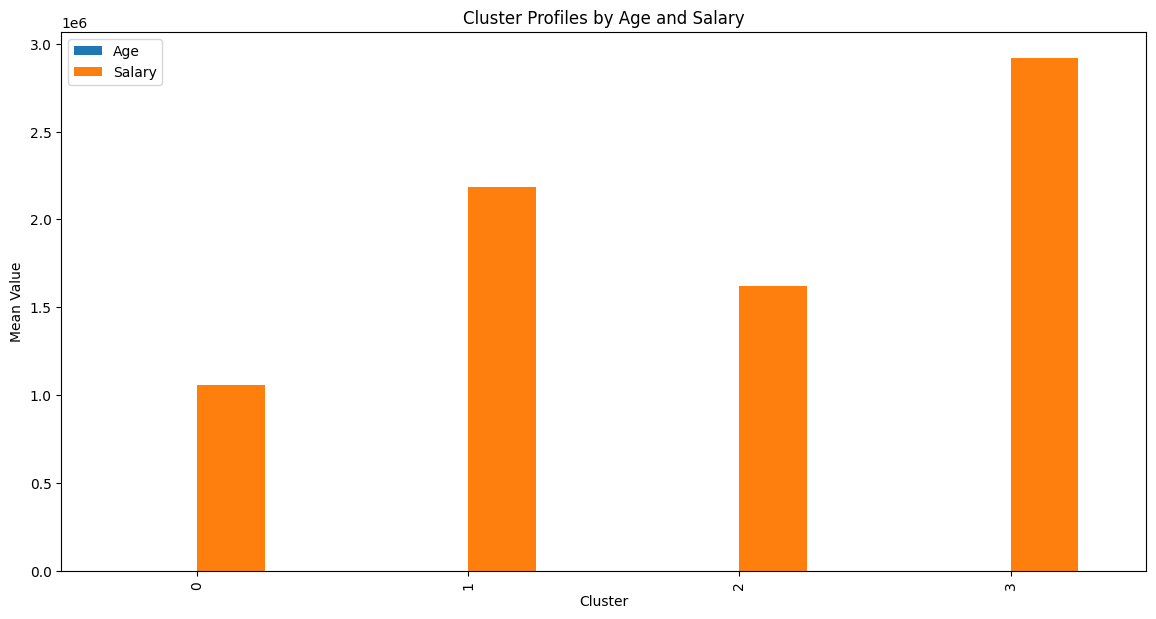

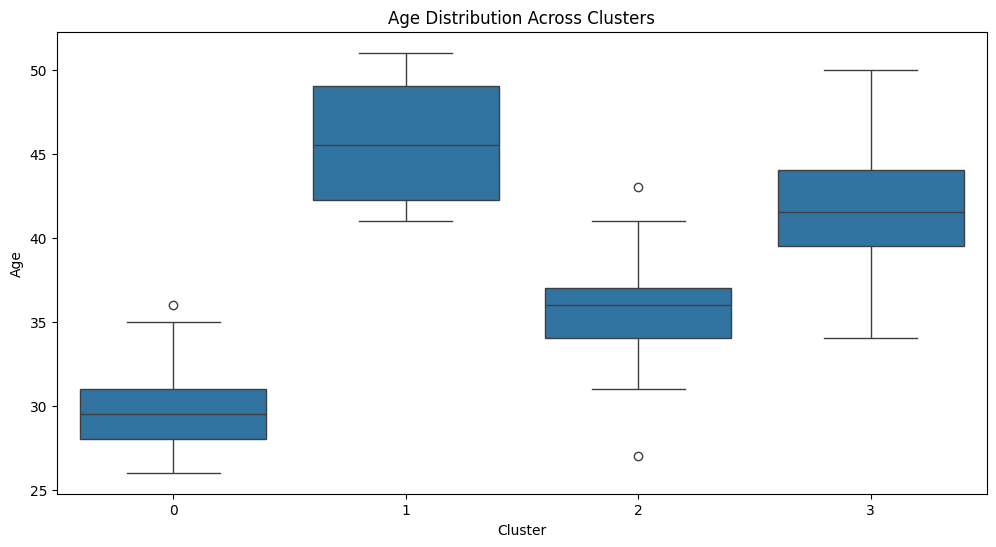

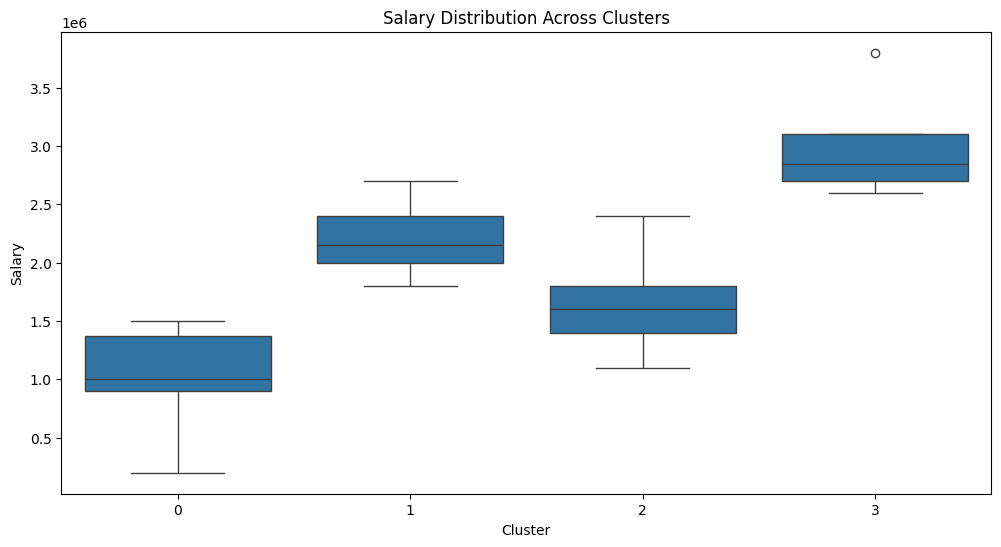

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the mean values of each cluster for Age and Salary
plt.figure(figsize=(12, 6))
cluster_profile.plot(kind='bar', figsize=(14, 7))
plt.title('Cluster Profiles by Age and Salary')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.show()

# Boxplot to see the distribution of Age within clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Age', data=customer_df)
plt.title('Age Distribution Across Clusters')
plt.show()

# Boxplot to see the distribution of Salary within clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Salary', data=customer_df)
plt.title('Salary Distribution Across Clusters')
plt.show()


Silhouette Analysis:

Average Silhouette Score: 0.38975390412701455


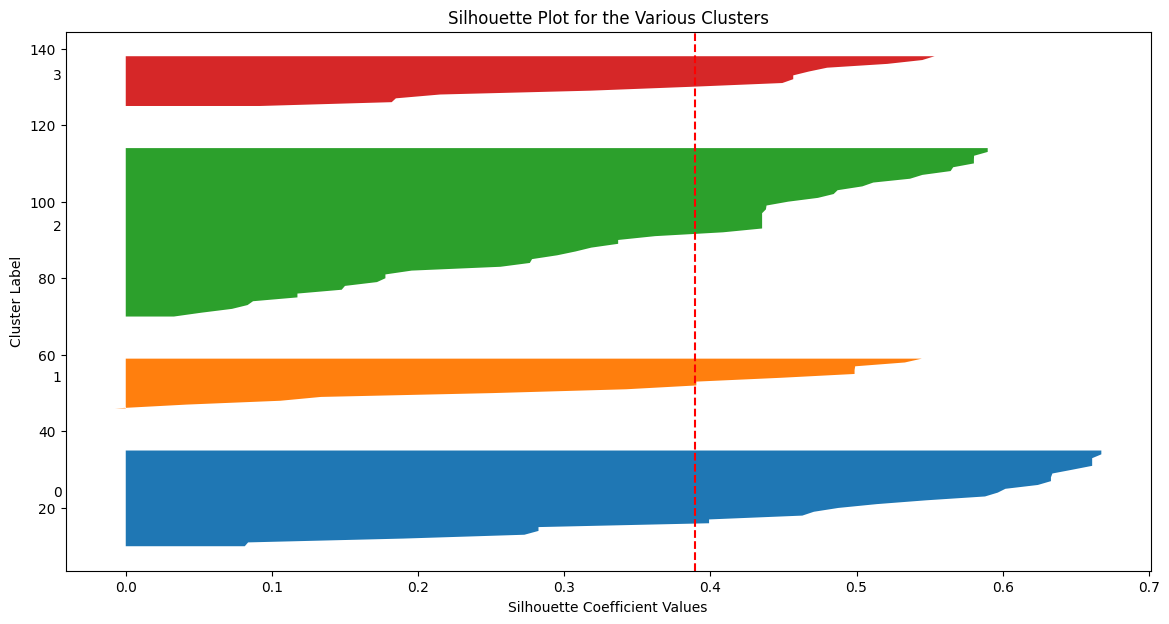

In [35]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

silhouette_avg = silhouette_score(scaled_features, customer_df['Cluster'])
print(f'Average Silhouette Score: {silhouette_avg}')

sample_silhouette_values = silhouette_samples(scaled_features, customer_df['Cluster'])

plt.figure(figsize=(14, 7))
y_lower = 10
for i in range(len(set(customer_df['Cluster']))):
    ith_cluster_silhouette_values = sample_silhouette_values[customer_df['Cluster'] == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

plt.title("Silhouette Plot for the Various Clusters")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()
